<a href="https://colab.research.google.com/github/raihankemmy/Data_Science-Project/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Package

In [ ]:
!pip install xgboost
!pip install imbalanced-learn
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

# Import Data

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius
0,2018-12-31,Kepulauan Seribu,Siang,Hujan Lokal,70 - 90,24 - 32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan Lokal,70 - 90,24 - 32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan Lokal,70 - 90,24 - 32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan Ringan,70 - 90,24 - 32
4,2018-12-31,Jakarta Utara,Siang,Hujan Lokal,70 - 90,24 - 32


Mengambil dataset prakiraan cuaca Provinsi DKI Jakarta tahun 2018 dari website <br> https://katalog.data.go.id/dataset/data-prakiraan-cuaca-wilayah-provinsi-dki-jakarta-tahun-2018

# Preprocessing

### Melihat Jumlah Baris dan Kolom

In [ ]:
df.shape

(8535, 6)

Dataset terdiri dari 8535 baris dan 6 kolom

### Melihat Missing Value

In [ ]:
df.isnull().sum()

tanggal                 135
wilayah                 135
waktu                   135
cuaca                   135
kelembaban_persen       135
suhu_derajat_celcius    135
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

tanggal                 0
wilayah                 0
waktu                   0
cuaca                   0
kelembaban_persen       0
suhu_derajat_celcius    0
dtype: int64

Membuang data yang kosong atau null

#### Melihat Kembali Jumlah Baris dan Kolom

In [ ]:
df.shape

(8400, 6)

Jumlah baris menjadi 8400 dan kolom tetap 6

### Informasi setiap Kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 0 to 8399
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tanggal               8400 non-null   object
 1   wilayah               8400 non-null   object
 2   waktu                 8400 non-null   object
 3   cuaca                 8400 non-null   object
 4   kelembaban_persen     8400 non-null   object
 5   suhu_derajat_celcius  8400 non-null   object
dtypes: object(6)
memory usage: 459.4+ KB


In [ ]:
df['waktu'].value_counts()

Siang        1758
Pagi         1758
Malam        1758
Dini Hari    1758
siang         342
pagi          342
malam         342
dini hari     342
Name: waktu, dtype: int64

In [ ]:
df['wilayah'].value_counts()

Kepulauan Seribu    1400
Jakarta Utara       1400
Jakarta Timur       1400
Jakarta Selatan     1400
Jakarta Pusat       1400
Jakarta Barat       1400
Name: wilayah, dtype: int64

In [ ]:
df['cuaca'].value_counts()

Cerah Berawan     3307
Berawan           2758
Hujan Lokal       1006
Hujan Ringan       431
Cerah              427
Hujan Petir        137
Berawan Tebal      115
Hujan Sedang       110
Cerah Berawan       32
Cerah               24
Berawan             19
Hujan Lokal         13
 Berawan             3
Hujan                2
Cerah berawan        2
Hujan Ringan         2
Cerah Berawah        2
Cerah                1
Cerah Berawn         1
Hujan Petir          1
Hujan Sedang         1
Cerang Berawan       1
Hujan Ringanl        1
Berawa               1
Hujang Sedang        1
Hujan Loka           1
Beawan               1
Name: cuaca, dtype: int64

## Data Cleaning

### Menggunakan Mapping untuk mengelompokkan jenis Cuaca

<Axes: xlabel='jenis_cuaca', ylabel='count'>

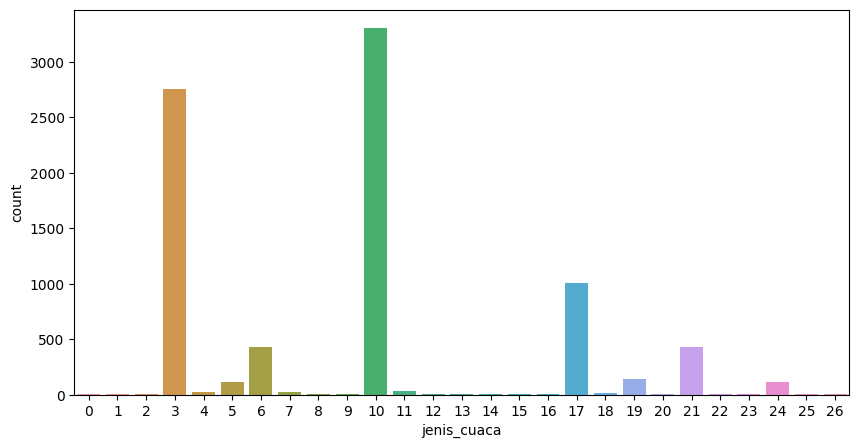

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
cuaca_kategorik = df.copy()
cuaca_kategorik['jenis_cuaca'] = LE.fit_transform(cuaca_kategorik['cuaca'])
ax, fig = plt.subplots(figsize=(10, 5))
sns.countplot(x='jenis_cuaca', data=cuaca_kategorik)

Visualisasi jenis cuaca

In [ ]:
df["cuaca"].unique()

array(['Hujan Lokal', 'Hujan Ringan', 'Berawan', 'Cerah Berawan', 'Cerah',
       'Berawan Tebal', 'Hujan Sedang', 'Cerah Berawn', 'Cerang Berawan',
       'Beawan', 'Berawan ', 'Hujan Petir', 'Hujan Lokal ',
       'Cerah Berawan ', 'Cerah ', 'Cerah Berawah', 'Cerah  ', ' Berawan',
       'Hujan', 'Hujan Petir ', 'Hujan Sedang ', 'Cerah berawan',
       'Hujan Ringanl', 'Berawa', 'Hujang Sedang', 'Hujan Loka',
       'Hujan Ringan '], dtype=object)

Terdapat 27 jenis cuaca sehingga akan dikelompokkan jenis cuaca menjadi 3 yaitu Hujan, Cerah dan Berawan

In [ ]:
kategori_cuaca = pd.DataFrame()
kategori_cuaca['cuaca'] = df['cuaca'].value_counts()
kategori_cuaca[['cuaca']]

,cuaca
Cerah Berawan,3307
Berawan,2758
Hujan Lokal,1006
Hujan Ringan,431
Cerah,427
Hujan Petir,137
Berawan Tebal,115
Hujan Sedang,110
Cerah Berawan,32
Cerah,24


#### Mapping Cuaca

In [ ]:
cuaca_map = {
    'Hujan Ringan': 'Hujan Ringan',
    'Hujan Petir': 'Hujan Petir',
    'Berawan': 'Berawan',
    'Hujan Sedang': 'Hujan Sedang',
    'Berawan Tebal': 'Berawan Tebal',
    'Hujan Lokal': 'Hujan Lokal',
    'Cerah Berawan': 'Cerah Berawan',
    'Berawan Tebal ': 'Berawan Tebal',
    'Berawan tebal': 'Berawan Tebal',
    'Berawan Sedang': 'Berawan',
    'Cerah': 'Cerah',
    'Berawan ': 'Berawan',
    'Cerah Berawan ': 'Cerah Berawan',
    'Cerah ': 'Cerah',
    'Hujan': 'Hujan Lokal',
    'Hujan Ringan ': 'Hujan Ringan',
    'Berawan Teba': 'Berawan Tebal',
    'Hujan RIngan': 'Hujan Ringan',
    ' Berawan': 'Berawan',
    'Hujan Lokal ': 'Hujan Lokal',
    'Hujan Loka': 'Hujan Lokal',
    'Hujang Sedang': 'Hujan Sedang',
    'Cerah berawan': 'Cerah Berawan',
    'Berawa': 'Berawan',
    'Hujan Ringanl': 'Hujan Ringan',
    'Hujan Sedang ': 'Hujan Sedang',
    'Hujan Petir ': 'Hujan Petir',
    'Cerah  ': 'Cerah',
    'Cerah Berawah': 'Cerah Berawan',
    'Beawan': 'Berawan',
    'Cerang Berawan': 'Cerah Berawan',
    'Cerah Berawn': 'Cerah Berawan'
}

df['cuaca'] = df['cuaca'].map(cuaca_map)

In [ ]:
kategori_cuaca = pd.DataFrame()
kategori_cuaca['cuaca'] = df['cuaca'].value_counts()
kategori_cuaca[['cuaca']]

,cuaca
Cerah Berawan,3345
Berawan,2782
Hujan Lokal,1022
Cerah,452
Hujan Ringan,434
Hujan Petir,138
Berawan Tebal,115
Hujan Sedang,112


Terdapat 8 jenis kategori cuaca

<Axes: xlabel='cuaca', ylabel='count'>

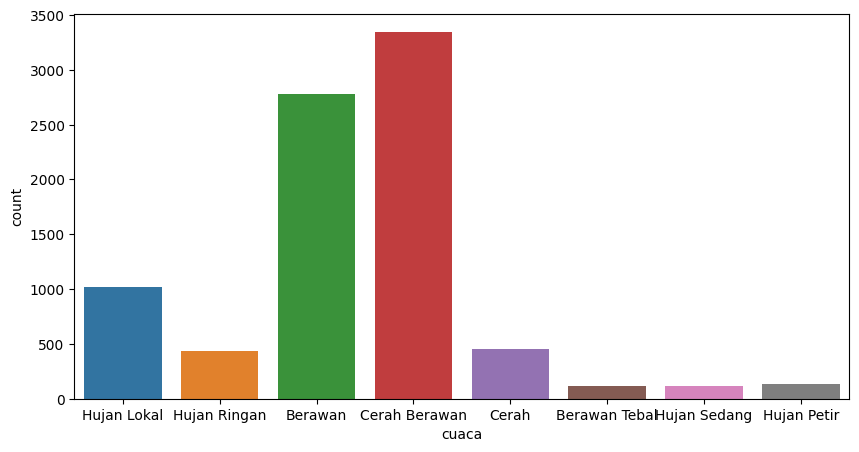

In [ ]:
ax, fig = plt.subplots(figsize=(10, 5))
sns.countplot(x='cuaca', data=df)

### Menggunakan Regular Expression untuk mengelompokkan jenis Waktu

<Axes: xlabel='waktu', ylabel='count'>

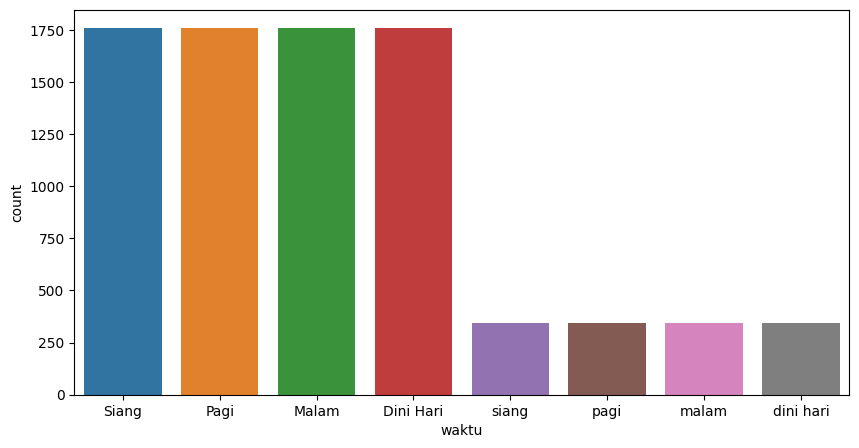

In [ ]:
ax, fig = plt.subplots(figsize=(10, 5))
sns.countplot(x='waktu', data=df)

Visualisasi jenis waktu

In [ ]:
kategori_waktu = pd.DataFrame()
kategori_waktu['waktu'] = df['waktu'].value_counts()
kategori_waktu[['waktu']]

,waktu
Siang,1758
Pagi,1758
Malam,1758
Dini Hari,1758
siang,342
pagi,342
malam,342
dini hari,342


Terdapat 8 jenis waktu pengambilan data cuaca sehingga akan dikelompokkan menjadi 4 waktu saja yaitu Siang, Pagi, Malam, dan Dini Hari

In [ ]:
import re

def cuaca(x):
  if (re.findall("dini hari", x)):
    return 'Dini Hari'
  elif (re.findall("siang", x)):
    return 'Siang'
  elif (re.findall("pagi", x)):
    return 'Pagi'
  elif (re.findall("malam", x)):
    return 'Malam'
  else:
    return x

df["waktu"] = df['waktu'].apply(cuaca)
df["waktu"].value_counts()

Siang        2100
Pagi         2100
Malam        2100
Dini Hari    2100
Name: waktu, dtype: int64

Waktu Siang terdapat 2100 data<br>
Waktu Pagi terdapat 2100 data<br>
Waktu Malam terdapat 2100 data<br>
Waktu Dini Hari terdapat 2100 data<br>

<Axes: xlabel='waktu', ylabel='count'>

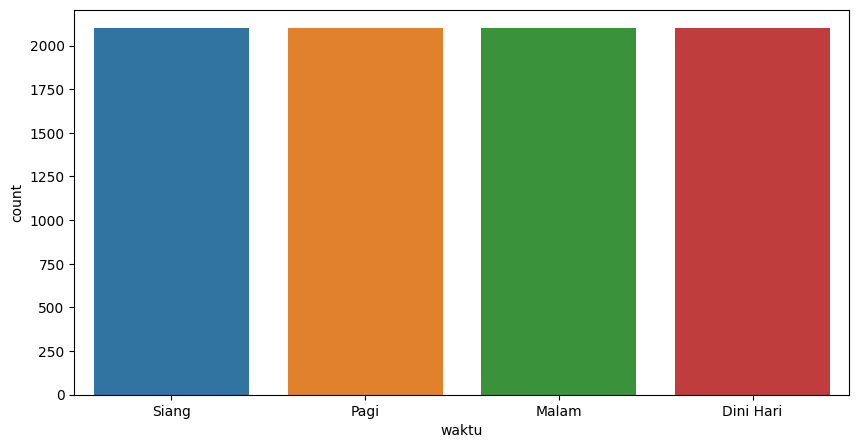

In [ ]:
ax, fig = plt.subplots(figsize=(10, 5))
sns.countplot(x='waktu', data=df)

## Feature Engineering

### kolom kelembaban_persen

#### Split Data Kelembaban menjadi Kelembaban Minimal dan Maximal

In [ ]:
df["kelembaban_min"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[0])
df["kelembaban_min"] = [x.strip(' ') for x in df["kelembaban_min"]]

df["kelembaban_max"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[1])
df["kelembaban_max"] = [x.strip(' ') for x in df["kelembaban_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembaban_min,kelembaban_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan Lokal,70 - 90,24 - 32,70,90
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan Lokal,70 - 90,24 - 32,70,90
2,2018-12-31,Kepulauan Seribu,Malam,Hujan Lokal,70 - 90,24 - 32,70,90
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan Ringan,70 - 90,24 - 32,70,90
4,2018-12-31,Jakarta Utara,Siang,Hujan Lokal,70 - 90,24 - 32,70,90


Membuat kolom kelembaban_min dengan mengambil nilai terkecil dari kolom kelembaban_persen<br>
Membuat kolom kelembaban_max dengan mengambil nilai terbesar dari kolom kelembaban_persen<br>
<br>
Dengan split data pada kolom kelembaban_persen agar terbagi menjadi 2 bagian untuk bagian kiri untuk nilai minimal dan bagian kanan untuk nilai maksimal

#### Membuat kolom kelembaban_mean

In [ ]:
df['kelembaban_mean'] = (df['kelembaban_min'].astype(int) + df['kelembaban_max'].astype(int)) / 2

df.drop(columns=['kelembaban_persen'], inplace=True)

Membuat kolom kelembaban_mean untuk menampung nilai rata-rata pada interval minimal dan maksimal,<br>
Lalu membuang kolom kelembaban_persen<br>
Karena informasi pada kolom tersebut sudah diwakili oleh kolom baru yang dibuat

#### Melihat Masing Masing Data dari Kelembaban Minimal, Maksimal dan Rata-Rata

In [ ]:
print('Kelembaban Min')
print(df['kelembaban_min'].value_counts(), '\n')

print('Kelembaban Max')
print(df['kelembaban_max'].value_counts(), '\n')

print('Kelembaban Mean')
print(df['kelembaban_mean'].value_counts())

Kelembaban Min
70    1728
55    1296
65    1272
60    1224
75     840
45     624
50     600
80     480
40     192
35      96
85      48
Name: kelembaban_min, dtype: int64 

Kelembaban Max
95     3264
90     2376
85     1128
100    1032
80      504
75       96
Name: kelembaban_max, dtype: int64 

Kelembaban Mean
80.0    1296
82.5    1296
85.0     864
72.5     792
70.0     744
75.0     720
77.5     696
67.5     528
87.5     360
62.5     336
90.0     312
65.0     264
57.5      72
55.0      48
60.0      48
92.5      24
Name: kelembaban_mean, dtype: int64


### kolom suhu_derajat_celcius

#### Split Data Suhu menjadi Suhu Minimal dan Maximal

In [ ]:
df["suhu_min"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[0])
df["suhu_min"] = [x.strip(' ') for x in df["suhu_min"]]

df["suhu_max"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[1])
df["suhu_max"] = [x.strip(' ') for x in df["suhu_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,suhu_derajat_celcius,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan Lokal,24 - 32,70,90,80.0,24,32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan Lokal,24 - 32,70,90,80.0,24,32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan Lokal,24 - 32,70,90,80.0,24,32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan Ringan,24 - 32,70,90,80.0,24,32
4,2018-12-31,Jakarta Utara,Siang,Hujan Lokal,24 - 32,70,90,80.0,24,32


Membuat kolom suhu_min dengan mengambil nilai terkecil dari kolom suhu_derajat_celcius<br>
Membuat kolom suhu_max dengan mengambil nilai terbesar dari kolom suhu_derajat_celcius<br>
<br>
Dengan split data pada kolom suhu_derajat_celcius agar terbagi menjadi 2 bagian untuk bagian kiri untuk nilai minimal dan bagian kanan untuk nilai maksimal

#### Membuat kolom suhu_mean

In [ ]:
df['suhu_mean'] = (df['suhu_min'].astype(int) + df['suhu_max'].astype(int)) / 2

df.drop(columns=['suhu_derajat_celcius'], inplace=True)

Membuat kolom suhu_mean untuk menampung nilai rata-rata pada interval minimal dan maksimal,<br>
Lalu membuang kolom suhu_derajat_celcius<br>
Karena informasi pada kolom tersebut sudah diwakili oleh kolom baru yang dibuat

#### Melihat Masing Masing Data dari Suhu Minimal, Maksimal dan Rata-Rata

In [ ]:
print('Suhu Min')
print(df['suhu_min'].value_counts(), '\n')

print('Suhu Max')
print(df['suhu_max'].value_counts(), '\n')

print('Suhu Mean')
print(df['suhu_mean'].value_counts())

Suhu Min
24    4104
23    3072
25     576
22     552
21      48
20      24
26      24
Name: suhu_min, dtype: int64 

Suhu Max
33    3432
32    1992
34    1440
31     696
30     360
35     288
29     120
28      72
Name: suhu_max, dtype: int64 

Suhu Mean
28.0    2064
28.5    1992
27.5    1656
29.0    1392
27.0     720
26.5     216
29.5     144
30.0      96
26.0      72
25.5      48
Name: suhu_mean, dtype: int64


In [ ]:
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max,suhu_mean
0,2018-12-31,Kepulauan Seribu,Siang,Hujan Lokal,70,90,80.0,24,32,28.0
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan Lokal,70,90,80.0,24,32,28.0
2,2018-12-31,Kepulauan Seribu,Malam,Hujan Lokal,70,90,80.0,24,32,28.0
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan Ringan,70,90,80.0,24,32,28.0
4,2018-12-31,Jakarta Utara,Siang,Hujan Lokal,70,90,80.0,24,32,28.0


## Mengubah Tipe Data yang tidak sesuai

#### Melihat Tipe Data setiap Kolom

In [ ]:
df.dtypes

tanggal             object
wilayah             object
waktu               object
cuaca               object
kelembaban_min      object
kelembaban_max      object
kelembaban_mean    float64
suhu_min            object
suhu_max            object
suhu_mean          float64
dtype: object

Memperbaiki jenis tipe data sesuai dengan isi dari data pada kolom tersebut

#### Mengubah Tipe data yang tidak sesuai

In [ ]:
updated = (df['tanggal'] == '2018-11-31')
updated

0       False
1       False
2       False
3       False
4       False
        ...  
8395    False
8396    False
8397    False
8398    False
8399    False
Name: tanggal, Length: 8400, dtype: bool

In [ ]:
df.loc[updated, ['tanggal']] = '2018-12-01'
df[df['tanggal'] == '2018-12-01']

,tanggal,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max,suhu_mean
720,2018-12-01,Kepulauan Seribu,Siang,Hujan Ringan,75,95,85.0,23,33,28.0
721,2018-12-01,Kepulauan Seribu,Pagi,Hujan Ringan,75,95,85.0,23,33,28.0
722,2018-12-01,Kepulauan Seribu,Malam,Hujan Ringan,75,95,85.0,23,33,28.0
723,2018-12-01,Kepulauan Seribu,Dini Hari,Berawan,75,95,85.0,23,33,28.0
724,2018-12-01,Jakarta Utara,Siang,Hujan Ringan,75,95,85.0,23,33,28.0
725,2018-12-01,Jakarta Utara,Pagi,Hujan Ringan,75,95,85.0,23,33,28.0
726,2018-12-01,Jakarta Utara,Malam,Hujan Ringan,75,95,85.0,23,33,28.0
727,2018-12-01,Jakarta Utara,Dini Hari,Berawan,75,95,85.0,23,33,28.0
728,2018-12-01,Jakarta Timur,Siang,Hujan Ringan,75,95,85.0,23,33,28.0
729,2018-12-01,Jakarta Timur,Pagi,Cerah Berawan,75,95,85.0,23,33,28.0


Mengubah data tanggal yang tidak sesuai

In [ ]:
df["kelembaban_min"] = df.kelembaban_min.astype(int)
df["kelembaban_max"] = df.kelembaban_max.astype(int)
df["suhu_min"] = df.suhu_min.astype(int)
df["suhu_max"] = df.suhu_max.astype(int)
df["tanggal"] = pd.to_datetime(df['tanggal'])
df.dtypes

tanggal            datetime64[ns]
wilayah                    object
waktu                      object
cuaca                      object
kelembaban_min              int64
kelembaban_max              int64
kelembaban_mean           float64
suhu_min                    int64
suhu_max                    int64
suhu_mean                 float64
dtype: object

Mengubah kolom kelembaban_min, kelembaban_max, suhu_min, dan suhu_max menjadi integer<br>
Karena data pada kolom tersebut bersifat numerikal<br>
Mengubah kolom tanggal menjadi datetime karena berisi tanggal pengambilan data

### Informasi Data

#### Melihat informasi mengenai kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 0 to 8399
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tanggal          8400 non-null   datetime64[ns]
 1   wilayah          8400 non-null   object        
 2   waktu            8400 non-null   object        
 3   cuaca            8400 non-null   object        
 4   kelembaban_min   8400 non-null   int64         
 5   kelembaban_max   8400 non-null   int64         
 6   kelembaban_mean  8400 non-null   float64       
 7   suhu_min         8400 non-null   int64         
 8   suhu_max         8400 non-null   int64         
 9   suhu_mean        8400 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 721.9+ KB


In [ ]:
df.sample(5)

,tanggal,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max,suhu_mean
8374,2018-01-02,Jakarta Timur,Dini Hari,Berawan,70,95,82.5,24,33,28.5
1127,2018-11-15,Jakarta Barat,Dini Hari,Cerah Berawan,65,90,77.5,24,32,28.0
5238,2018-05-20,Jakarta Utara,Malam,Cerah Berawan,65,100,82.5,24,32,28.0
6528,2018-03-23,Kepulauan Seribu,Siang,Cerah Berawan,65,90,77.5,23,32,27.5
2977,2018-08-26,Kepulauan Seribu,Pagi,Cerah Berawan,45,90,67.5,24,34,29.0


In [ ]:
df['cuaca'].value_counts()

Cerah Berawan    3345
Berawan          2782
Hujan Lokal      1022
Cerah             452
Hujan Ringan      434
Hujan Petir       138
Berawan Tebal     115
Hujan Sedang      112
Name: cuaca, dtype: int64

Data termasuk tidak balanced<br>
Sehingga kedepannya akan dilakukan proses oversampling menggunakan SMOTE

In [ ]:
tanggal_awal = df['tanggal'].dt.date.min()
tanggal_akhir = df['tanggal'].dt.date.max()

print('Tanggal Awal', tanggal_awal, '\nTanggal Akhir', tanggal_akhir)

Tanggal Awal 2018-01-02 
Tanggal Akhir 2018-12-31


Melihat tanggal awal pengambilan data hingga akhir pengambilan data

In [ ]:
import calendar

df_tanggal = pd.DataFrame()
df_tanggal['bulan'] = df['tanggal'].dt.month
df_tanggal['bulan'] = df_tanggal['bulan'].apply(lambda x: calendar.month_name[x])

df_tanggal['tanggal'] = df['tanggal'].dt.day
grouped = df_tanggal.groupby('bulan')['tanggal'].nunique()
grouped

bulan
April        29
August       30
December     31
February     25
January      30
July         30
June         29
March        28
May          29
November     28
October      30
September    29
Name: tanggal, dtype: int64

In [ ]:
df_tanggal[df_tanggal['bulan'] == 'February']['tanggal'].unique()

array([26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,
        9,  8,  7,  6,  5,  4,  3,  1])

Melihat apakah data setiap hari sudah lengkap atau belum<br>
Berdasarkan analisis didapatkan bahwa data tidak terupdate setiap hari pada setiap bulannya

#### Membagi data antara kolom numerikal dengan kategorikal

In [ ]:
numeric = ['kelembaban_min', 'kelembaban_max', 'suhu_min', 'suhu_max', 'kelembaban_mean', 'suhu_mean']
categoric = ['cuaca', 'waktu', 'wilayah']

#### Statistik kolom numerik

In [ ]:
df[numeric].describe()

,kelembaban_min,kelembaban_max,suhu_min,suhu_max,kelembaban_mean,suhu_mean
count,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000
mean,62.257143,91.728571,23.548571,32.608571,76.992857,28.078571
std,10.592657,5.562760,0.775885,1.246067,7.565168,0.752354
min,35.000000,75.000000,20.000000,28.000000,55.000000,25.500000
25%,55.000000,90.000000,23.000000,32.000000,72.500000,27.500000
50%,65.000000,95.000000,24.000000,33.000000,77.500000,28.000000
75%,70.000000,95.000000,24.000000,33.000000,82.500000,28.500000
max,85.000000,100.000000,26.000000,35.000000,92.500000,30.000000


Persebaran nilai pada data kelembaban_min, kelembaban_max, suhu_min, suhu_max, kelembaban_mean dan suhu_mean sudah bagus<br>
Persebaran data yang simetrik distribusinya dilihat dari nilai mean dan median yang tidak berbeda jauh<br>
sehingga tidak perlu dilakukan normalisasi

#### Statistik kolom kategorik

In [ ]:
df[categoric].describe()

,cuaca,waktu,wilayah
count,8400,8400,8400
unique,8,4,6
top,Cerah Berawan,Siang,Kepulauan Seribu
freq,3345,2100,1400


Kolom cuaca, waktu, dan wilayah masih bersifat object / string maka selanjutnya akan dilakukan encode pada data kolom tersebut

#### Melihat duplikasi data

In [ ]:
df.duplicated().sum()

0

Tidak terdapat data yg duplikat

## Encoding

#### Mengubah kolom kategorik menggunakan one-hot encoding

In [ ]:
df.dtypes

tanggal            datetime64[ns]
wilayah                    object
waktu                      object
cuaca                      object
kelembaban_min              int64
kelembaban_max              int64
kelembaban_mean           float64
suhu_min                    int64
suhu_max                    int64
suhu_mean                 float64
dtype: object

In [ ]:
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max,suhu_mean
0,2018-12-31,Kepulauan Seribu,Siang,Hujan Lokal,70,90,80.0,24,32,28.0
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan Lokal,70,90,80.0,24,32,28.0
2,2018-12-31,Kepulauan Seribu,Malam,Hujan Lokal,70,90,80.0,24,32,28.0
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan Ringan,70,90,80.0,24,32,28.0
4,2018-12-31,Jakarta Utara,Siang,Hujan Lokal,70,90,80.0,24,32,28.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df_encode = df.copy()

kategorik = df.select_dtypes(include=['object']).drop('cuaca', axis=1).columns
numerik = df.select_dtypes(exclude=['object']).columns

transformer = ColumnTransformer([
    ('categoric', OneHotEncoder(dtype=int, sparse_output=False), kategorik),
    ('label', 'passthrough', ['cuaca']),
    ('numeric', 'passthrough', numerik),
])

encode_data = transformer.fit_transform(df_encode)
encode_kategorik = transformer.named_transformers_['categoric'].get_feature_names_out(kategorik)
encode_kolom = list(encode_kategorik) + ['cuaca'] + list(numerik)

df_encode = pd.DataFrame(encode_data, columns=encode_kolom)
df_encode.head()

,wilayah_Jakarta Barat,wilayah_Jakarta Pusat,wilayah_Jakarta Selatan,wilayah_Jakarta Timur,wilayah_Jakarta Utara,wilayah_Kepulauan Seribu,waktu_Dini Hari,waktu_Malam,waktu_Pagi,waktu_Siang,cuaca,tanggal,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max,suhu_mean
0,0,0,0,0,0,1,0,0,0,1,Hujan Lokal,2018-12-31,70,90,80.0,24,32,28.0
1,0,0,0,0,0,1,0,0,1,0,Hujan Lokal,2018-12-31,70,90,80.0,24,32,28.0
2,0,0,0,0,0,1,0,1,0,0,Hujan Lokal,2018-12-31,70,90,80.0,24,32,28.0
3,0,0,0,0,0,1,1,0,0,0,Hujan Ringan,2018-12-31,70,90,80.0,24,32,28.0
4,0,0,0,0,1,0,0,0,0,1,Hujan Lokal,2018-12-31,70,90,80.0,24,32,28.0


<b>Ilustrasi hasil dari tahapan Encoding menggunakan One-Hot Encoding dengan Columns Transformer

Mengubah kolom kategorik menjadi bentuk numerik,<br>
Kolom label atau cuaca tidak diubah karena merupakan target klasifikasi<br>
Kolom numerik di 'passthrough' karena tidak dilakukan scaling/normalisasi<br>
Penggunaan 'passthrough' dilakukan agar menjaga kolom-kolom yang tidak memerlukan transformasi tetap ada dalam output

In [ ]:
kolom1 = df_encode.columns[df_encode.columns.str.contains('waktu|wilayah', case=False)]
df_encode[kolom1] = df_encode[kolom1].astype(int)

kolom2 = df_encode.columns[df_encode.columns.str.contains('mean', case=False)]
df_encode[kolom2] = df_encode[kolom2].astype(float)

kolom3 = df_encode.columns[df_encode.columns.str.contains('min|max', case=False)]
df_encode[kolom3] = df_encode[kolom3].astype(int)

df_encode.dtypes

wilayah_Jakarta Barat                int64
wilayah_Jakarta Pusat                int64
wilayah_Jakarta Selatan              int64
wilayah_Jakarta Timur                int64
wilayah_Jakarta Utara                int64
wilayah_Kepulauan Seribu             int64
waktu_Dini Hari                      int64
waktu_Malam                          int64
waktu_Pagi                           int64
waktu_Siang                          int64
cuaca                               object
tanggal                     datetime64[ns]
kelembaban_min                       int64
kelembaban_max                       int64
kelembaban_mean                    float64
suhu_min                             int64
suhu_max                             int64
suhu_mean                          float64
dtype: object

# Visualisasi Data

In [ ]:
# sns.pairplot(df, hue="cuaca", corner=True)

persebaran data cuaca Provinsi DKI Jakarta pada Tahun 2018

## Feature Selection

Pada tahapan ini feature selection menggunakan algoritma Random Forest<br>
Menggunakan rasio 80% data latih dan 20% data uji<br>
<br>
Tahapan pengujian hanya dilakukan untuk kolom waktu dan wilayah<br>
Karena menurut beberapa jurnal, cuaca dipengaruhi oleh kelembaban dan suhu<br>
Sehingga kolom kelembaban dan suhu tetap digunakan
<br><br>
Tahapan ini memiliki 4 kondisi, yaitu:
  - menguji kolom waktu dan wilayah
  - menguji kolom waktu
  - menguji kolom wilayah
  - menguji tanpa kolom waktu dan wilayah


### Membuang Kolom yang tidak memengaruhi hasil akurasi
#### <b>Menggunakan metode Wrapper dengan Backward Elimination</b>
Menggunakan algoritma Random Forest sebagai contoh model yang digunakan<br>
Serta menggunakan data df_encode yang sudah dilakukan tahapan Encoding secara manual

In [ ]:
df.drop(columns=["tanggal"], inplace=True)
df_encode.drop(columns=["tanggal"], inplace=True)

Membuang kolom tanggal karena tidak diperlukan dalam proses<br>
Menganalisis dan memproses data cuaca Provinsi DKI Jakarta tahun 2018

In [ ]:
hasil_model = pd.DataFrame(columns=['model', 'akurasi'])

#### Model 1 [Waktu, Wilayah]

In [ ]:
df_selection = df_encode.copy()

X = df_selection.drop(columns=['cuaca'])
y = df_selection[['cuaca']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
      
hasil_model = hasil_model.append({'model': 'model[Waktu, Wilayah]',
                                  'akurasi': score}, ignore_index=True)
hasil_model.head()

<ipython-input-719-643df5d6c774>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-719-643df5d6c774>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'model[Waktu, Wilayah]',


,model,akurasi
0,"model[Waktu, Wilayah]",0.532143


#### Model 2 [Waktu]

In [ ]:
kolom = df_encode.columns[df_encode.columns.str.contains('wilayah', case=False)]
kolom.tolist() + ['cuaca']

['wilayah_Jakarta Barat',
 'wilayah_Jakarta Pusat',
 'wilayah_Jakarta Selatan',
 'wilayah_Jakarta Timur',
 'wilayah_Jakarta Utara',
 'wilayah_Kepulauan Seribu',
 'cuaca']

In [ ]:
df_selection = df_encode.copy()

X = df_selection.drop(columns=kolom.tolist() + ['cuaca'])
y = df_selection[['cuaca']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
      
hasil_model = hasil_model.append({'model': 'model[Waktu]',
                                  'akurasi': score}, ignore_index=True)
hasil_model.head()

<ipython-input-721-5d56007f515e>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-721-5d56007f515e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'model[Waktu]',


,model,akurasi
0,"model[Waktu, Wilayah]",0.532143
1,model[Waktu],0.572619


#### Model 3 [Wilayah]

In [ ]:
kolom = df_encode.columns[df_encode.columns.str.contains('waktu', case=False)]
kolom.tolist() + ['cuaca']

['waktu_Dini Hari', 'waktu_Malam', 'waktu_Pagi', 'waktu_Siang', 'cuaca']

In [ ]:
df_selection = df_encode.copy()

X = df_selection.drop(columns=kolom.tolist() + ['cuaca'])
y = df_selection[['cuaca']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
      
hasil_model = hasil_model.append({'model': 'model[Wilayah]',
                                  'akurasi': score}, ignore_index=True)
hasil_model.head()

<ipython-input-723-859239705e13>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-723-859239705e13>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'model[Wilayah]',


,model,akurasi
0,"model[Waktu, Wilayah]",0.532143
1,model[Waktu],0.572619
2,model[Wilayah],0.461310


#### Model 4 Tanpa [Waktu, Wilayah]

In [ ]:
kolom = df_encode.columns[df_encode.columns.str.contains('waktu|wilayah', case=False)]
kolom.tolist() + ['cuaca']

['wilayah_Jakarta Barat',
 'wilayah_Jakarta Pusat',
 'wilayah_Jakarta Selatan',
 'wilayah_Jakarta Timur',
 'wilayah_Jakarta Utara',
 'wilayah_Kepulauan Seribu',
 'waktu_Dini Hari',
 'waktu_Malam',
 'waktu_Pagi',
 'waktu_Siang',
 'cuaca']

In [ ]:
df_selection = df_encode.copy()

X = df_selection.drop(columns=kolom.tolist() + ['cuaca'])
y = df_selection[['cuaca']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
      
hasil_model = hasil_model.append({'model': 'model tanpa[Waktu, Wilayah]',
                                  'akurasi': score}, ignore_index=True)
hasil_model.head()

<ipython-input-725-2d1fb9ce1423>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-725-2d1fb9ce1423>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'model tanpa[Waktu, Wilayah]',


,model,akurasi
0,"model[Waktu, Wilayah]",0.532143
1,model[Waktu],0.572619
2,model[Wilayah],0.461310
3,"model tanpa[Waktu, Wilayah]",0.501190


Berdasarkan hasil pemodelan tersebut, diputuskan untuk membuang kolom wilayah<br>
Karena tidak memengaruhi hasil akurasi menjadi lebih baik

In [ ]:
df.drop(columns=['wilayah'], inplace=True)
df.columns

Index(['waktu', 'cuaca', 'kelembaban_min', 'kelembaban_max', 'kelembaban_mean',
       'suhu_min', 'suhu_max', 'suhu_mean'],
      dtype='object')

## Simpan Data
Karena tahapan praproses data sudah selesai, data diduplikasi pada DataFrame yang baru dan<br>
Data juga disimpan pada file CSV yang baru agar data dapat digunakan kembali tanpa harus mengulang tahapan praproses data

In [ ]:
df.to_csv(path_or_buf='clean_data.csv', index=False)

Menyimpan data dengan format CSV<br>
Dengan nama **clean_data.csv**

# Pemodelan

### Columns Transformer

In [ ]:
kategorik = df.select_dtypes(include=['object']).drop('cuaca', axis=1).columns

columntransform = ColumnTransformer([
    ('categoric', OneHotEncoder(dtype=int, handle_unknown='ignore'), kategorik),
], remainder='passthrough')

### Feature Scaling Data
Tidak menggunakan Scaling pada kolom numerikal

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# numeric = ["kelembaban_min", "kelembaban_max", "suhu_min", "suhu_max"]

# poly = PolynomialFeatures(degree=2, interaction_only=True)

# X_train[poly.get_feature_names(numeric)] = poly.fit_transform(X_train[numeric])
# X_test[poly.get_feature_names(numeric)] = poly.fit_transform(X_test[numeric])


### Pembagian Data

In [ ]:
df_model = df.copy()

In [ ]:
X = df_model.drop(columns=["cuaca"])
y = df_model["cuaca"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6720, 7), (1680, 7), (6720,), (1680,))

Membagi data berdasarkan data latih dan data uji<br>Dengan perbandingan data uji sebesar 20% dan data latih sebesar 80% dari total data dengan pembagian secara stratify terhadap kolom cuaca<br>
<br>
Membagi data menjadi fitur dan target, dimana variable y merupakan target yaitu kolom cuaca<br>
Sedangkan variable x merupakan sisa kolom selain kolom cuaca<br>
<br>
Total data latih 6720 data<br>
Total data uji 1680 data

# Fit Data

In [ ]:
hasil_model = pd.DataFrame(columns=['model', 'akurasi testing', 'akurasi training'])

## Random Forest

#### Tanpa Resampling Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import AllKNN

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=150))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model RF', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

<ipython-input-734-e954a299d9c1>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model RF', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.579167,0.655506


#### Menggunakan Oversampling SMOTE

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', SMOTE(random_state=42, n_jobs=-1, k_neighbors=9)), 
    ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=150))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model RF, Oversampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
<ipython-input-735-c55ce319fb6d>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model RF, Oversampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.579167,0.655506
1,"Model RF, Oversampling",0.540476,0.617560


#### Menggunakan Undersampling AllKNN

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', AllKNN(n_jobs=-1, n_neighbors=9)), 
    ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=150))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model RF, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

<ipython-input-736-e9460a4e3eb3>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model RF, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.579167,0.655506
1,"Model RF, Oversampling",0.540476,0.617560
2,"Model RF, Undersampling",0.509524,0.570685


## Extreme Gradient Boosting (XGBoost)

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_xgb = df.copy()
label_encoder = LabelEncoder()
df_xgb['cuaca'] = label_encoder.fit_transform(df_xgb["cuaca"])

X_xgb = df_model.drop(columns=["cuaca"])
y_xgb = df_xgb['cuaca']

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, stratify=y, random_state=42, shuffle=True)

#### Tanpa Resampling Data

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('classifier', XGBClassifier(n_jobs=-1, random_state=42, n_estimators=150, objective='multi:softmax', num_class=len(label_encoder.classes_)))
])

model.fit(X_train_xgb, y_train_xgb)
score_test = model.score(X_test_xgb, y_test_xgb)
score_train = model.score(X_train_xgb, y_train_xgb)

hasil_model = hasil_model.append({'model': 'Model XGBoost', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

<ipython-input-739-ab0268b1dbee>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model XGBoost', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.579167,0.655506
1,"Model RF, Oversampling",0.540476,0.617560
2,"Model RF, Undersampling",0.509524,0.570685
3,Model XGBoost,0.577976,0.651488


#### Menggunakan Oversampling SMOTE

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', SMOTE(random_state=42, n_jobs=-1, k_neighbors=9)), 
    ('classifier', XGBClassifier(n_jobs=-1, random_state=42, n_estimators=150, objective='multi:softmax', num_class=len(label_encoder.classes_)))
])

model.fit(X_train_xgb, y_train_xgb)
score_test = model.score(X_test_xgb, y_test_xgb)
score_train = model.score(X_train_xgb, y_train_xgb)

hasil_model = hasil_model.append({'model': 'Model XGBoost, Oversampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
<ipython-input-740-7d0206b7793d>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model XGBoost, Oversampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.579167,0.655506
1,"Model RF, Oversampling",0.540476,0.617560
2,"Model RF, Undersampling",0.509524,0.570685
3,Model XGBoost,0.577976,0.651488
4,"Model XGBoost, Oversampling",0.539881,0.611607


#### Menggunakan Undersampling AllKNN

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', AllKNN(n_jobs=-1, n_neighbors=9)), 
    ('classifier', XGBClassifier(n_jobs=-1, random_state=42, n_estimators=150, objective='multi:softmax', num_class=len(label_encoder.classes_)))
])

model.fit(X_train_xgb, y_train_xgb)
score_test = model.score(X_test_xgb, y_test_xgb)
score_train = model.score(X_train_xgb, y_train_xgb)

hasil_model = hasil_model.append({'model': 'Model XGBoost, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

<ipython-input-741-d041c6977729>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model XGBoost, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.579167,0.655506
1,"Model RF, Oversampling",0.540476,0.617560
2,"Model RF, Undersampling",0.509524,0.570685
3,Model XGBoost,0.577976,0.651488
4,"Model XGBoost, Oversampling",0.539881,0.611607
5,"Model XGBoost, Undersampling",0.510714,0.573065


## Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

#### Tanpa Resampling Data

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('classifier', ExtraTreesClassifier(n_jobs=-1, random_state=42, n_estimators=150))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model XTrees', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

<ipython-input-743-b3a16f17cba9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model XTrees', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.579167,0.655506
1,"Model RF, Oversampling",0.540476,0.617560
2,"Model RF, Undersampling",0.509524,0.570685
3,Model XGBoost,0.577976,0.651488
4,"Model XGBoost, Oversampling",0.539881,0.611607
5,"Model XGBoost, Undersampling",0.510714,0.573065
6,Model XTrees,0.575000,0.655506


#### Menggunakan Oversampling SMOTE

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', SMOTE(random_state=42, n_jobs=-1, k_neighbors=9)), 
    ('classifier', ExtraTreesClassifier(n_jobs=-1, random_state=42, n_estimators=150))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model XTrees, SMOTE', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
<ipython-input-744-9f3f5a08d5dd>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model XTrees, SMOTE', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.579167,0.655506
1,"Model RF, Oversampling",0.540476,0.617560
2,"Model RF, Undersampling",0.509524,0.570685
3,Model XGBoost,0.577976,0.651488
4,"Model XGBoost, Oversampling",0.539881,0.611607
5,"Model XGBoost, Undersampling",0.510714,0.573065
6,Model XTrees,0.575000,0.655506
7,"Model XTrees, SMOTE",0.540476,0.619345


#### Menggunakan Undersampling AllKNN

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', AllKNN(n_jobs=-1, n_neighbors=9)), 
    ('classifier', ExtraTreesClassifier(n_jobs=-1, random_state=42, n_estimators=150))
])

model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
score_train = model.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model RF, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

<ipython-input-745-5d472da57535>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model RF, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.579167,0.655506
1,"Model RF, Oversampling",0.540476,0.617560
2,"Model RF, Undersampling",0.509524,0.570685
3,Model XGBoost,0.577976,0.651488
4,"Model XGBoost, Oversampling",0.539881,0.611607
5,"Model XGBoost, Undersampling",0.510714,0.573065
6,Model XTrees,0.575000,0.655506
7,"Model XTrees, SMOTE",0.540476,0.619345
8,"Model RF, Undersampling",0.509524,0.570685


## Categorical Boosting

In [ ]:
from catboost import CatBoostClassifier

#### Tanpa Resampling Data

In [ ]:
model_final = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('classifier', CatBoostClassifier(random_state=42, verbose=False))
])

model_final.fit(X_train, y_train)
score_test = model_final.score(X_test, y_test)
score_train = model_final.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model Catboost', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

<ipython-input-747-8cde756f312e>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model Catboost', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.579167,0.655506
1,"Model RF, Oversampling",0.540476,0.617560
2,"Model RF, Undersampling",0.509524,0.570685
3,Model XGBoost,0.577976,0.651488
4,"Model XGBoost, Oversampling",0.539881,0.611607
5,"Model XGBoost, Undersampling",0.510714,0.573065
6,Model XTrees,0.575000,0.655506
7,"Model XTrees, SMOTE",0.540476,0.619345
8,"Model RF, Undersampling",0.509524,0.570685
9,Model Catboost,0.584524,0.650595


#### Menggunakan Oversampling SMOTE

In [ ]:
model_smote = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', SMOTE(random_state=42, n_jobs=-1, k_neighbors=9)), 
    ('classifier', CatBoostClassifier(random_state=42, verbose=False))
])

model_smote.fit(X_train, y_train)
score_test = model_smote.score(X_test, y_test)
score_train = model_smote.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model Catboost, SMOTE', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
<ipython-input-748-4cd38b468e64>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model Catboost, SMOTE', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.579167,0.655506
1,"Model RF, Oversampling",0.540476,0.617560
2,"Model RF, Undersampling",0.509524,0.570685
3,Model XGBoost,0.577976,0.651488
4,"Model XGBoost, Oversampling",0.539881,0.611607
5,"Model XGBoost, Undersampling",0.510714,0.573065
6,Model XTrees,0.575000,0.655506
7,"Model XTrees, SMOTE",0.540476,0.619345
8,"Model RF, Undersampling",0.509524,0.570685
9,Model Catboost,0.584524,0.650595


#### Menggunakan Undersampling AllKNN

In [ ]:
model_allknn = Pipeline(steps=[
    ('preprocessor', columntransform),
    ('resampling', AllKNN(n_jobs=-1, n_neighbors=9)), 
    ('classifier', CatBoostClassifier(random_state=42, verbose=False))
])

model_allknn.fit(X_train, y_train)
score_test = model_allknn.score(X_test, y_test)
score_train = model_allknn.score(X_train, y_train)

hasil_model = hasil_model.append({'model': 'Model Catboost, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)
hasil_model

<ipython-input-749-054fceb07339>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hasil_model = hasil_model.append({'model': 'Model Catboost, Undersampling', 'akurasi testing': score_test, 'akurasi training': score_train}, ignore_index=True)


,model,akurasi testing,akurasi training
0,Model RF,0.579167,0.655506
1,"Model RF, Oversampling",0.540476,0.617560
2,"Model RF, Undersampling",0.509524,0.570685
3,Model XGBoost,0.577976,0.651488
4,"Model XGBoost, Oversampling",0.539881,0.611607
5,"Model XGBoost, Undersampling",0.510714,0.573065
6,Model XTrees,0.575000,0.655506
7,"Model XTrees, SMOTE",0.540476,0.619345
8,"Model RF, Undersampling",0.509524,0.570685
9,Model Catboost,0.584524,0.650595


# Kesimpulan

Berdasarkan hasil akurasi pada algoritma Random Forest, XGBoost, Extra Trees dan Catboost didapatkan bahwa: <br>
- Akurasi tertinggi didapatkan oleh algoritma Catboost tanpa Resampling Data yaitu 58,45% untuk akurasi testing dan 65,06% untuk akurasi training

- Berdasarkan ke-4 algoritma yang digunakan, algoritma Catboost menghasilkan hasil akurasi tertinggi dari ke-3 algoritma lainnya

- Hasil akurasi Model tanpa Resampling Data menghasilkan nilai akurasi yang lebih tinggi dari pada menggunakan oversampling dengan SMOTE atau menggunakan undersampling dengan AllKNN

- Metode oversampling dan undersampling membuat data menjadi lebih seimbang dan tidak overfitting, Namun tidak meningkatkan hasil akurasi menjadi lebih baik

# Manual Prediksi

In [ ]:
X_train.columns

Index(['waktu', 'kelembaban_min', 'kelembaban_max', 'kelembaban_mean',
       'suhu_min', 'suhu_max', 'suhu_mean'],
      dtype='object')

In [ ]:
df.head()

,waktu,cuaca,kelembaban_min,kelembaban_max,kelembaban_mean,suhu_min,suhu_max,suhu_mean
0,Siang,Hujan Lokal,70,90,80.0,24,32,28.0
1,Pagi,Hujan Lokal,70,90,80.0,24,32,28.0
2,Malam,Hujan Lokal,70,90,80.0,24,32,28.0
3,Dini Hari,Hujan Ringan,70,90,80.0,24,32,28.0
4,Siang,Hujan Lokal,70,90,80.0,24,32,28.0


In [ ]:
prediksi = {
    'wilayah': ['Kepulauan Seribu'],
    'waktu': ['Siang'],
    'kelembaban_min': [70],
    'kelembaban_max': [90],
    'kelembaban_mean': [80.0],
    'suhu_min': [24],
    'suhu_max': [32],
    'suhu_mean': [28.0],
    'waktu': ['Siang']
}

In [ ]:
def manual_testing(cuaca):
    df_pred = pd.DataFrame(cuaca)

    pred_1 = model_final.predict(df_pred)
    pred_2 = model_smote.predict(df_pred)
    pred_3 = model_allknn.predict(df_pred)

    return print("\nCategorical Boosting Prediction: {} \nCategorical Boosting Oversampling Prediction: {} \nCategorical Boosting UnderSampling Prediction: {} \n".format((pred_1[0]), format(pred_2[0]), format(pred_3[0])))                                                        

In [ ]:
manual_testing(prediksi)


Categorical Boosting Prediction: ['Hujan Lokal'] 
Categorical Boosting Oversampling Prediction: ['Hujan Lokal'] 
Categorical Boosting UnderSampling Prediction: ['Hujan Lokal'] 

